In [1]:
import xarray as xr
import numpy as np
#np.set_printoptions(threshold=np.nan)
import matplotlib.pyplot as plt
from scipy.interpolate import interp2d
import gsw
import os
# from palettable.colorbrewer.diverging import RdYlBu_10

In [8]:
state = xr.open_dataset("/Users/weiyangbao/Desktop/sill12/state_001.nc") 
#state.U

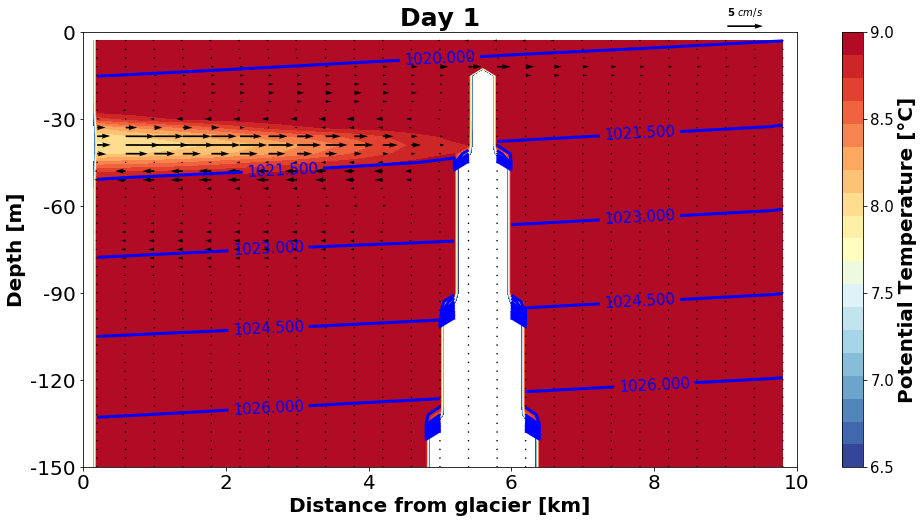

In [9]:

fig_path = "/Users/weiyangbao/Documents/Jupyter_Figs/Sill012/Along_fjord_animation_Qf1000/"
if not os.path.exists(fig_path):
    os.makedirs(fig_path)
    
count = 0
# From day 1 to day 30
for i in range(2, 3):
    count += 1
    pt = state.Temp.isel(T = i)
    s = state.S.isel(T = i)
    u = state.U.isel(T = i)
    w = state.W.isel(T = i)

# Mean value in Y direction, boundaries removed
    pt_ymean = pt.data[:, 1:10, :].mean(1)
    s_ymean = s.data[:, 1:10, :].mean(1)
    u_ymean = (u.data[:, 1:10, 1:].mean(1) + u.data[:, 1:10, :-1].mean(1)) / 2
    w_ymean = w.data[:, 1:10, :].mean(1)


# Interpolate in Z direction
    #x = np.arange(100, 10000, 200)!!
    x = state.X.data
    z0 = state.Z.data
    z1 = np.arange(-1.5,-150,-3)
    pres = gsw.p_from_z(z1, 0)


    f_pt = interp2d(x, z0, pt_ymean)
    f_s = interp2d(x, z0, s_ymean)
    f_u = interp2d(x, z0, u_ymean)
    f_w = interp2d(x, z0, w_ymean)
    pt_interp = f_pt(x, z1)
#pt_interp[pt_interp == 0] = 'nan'
    s_interp = f_s(x, z1)
    s_interp[s_interp == 0] = 'nan'
    rho_interp = gsw.rho(s_interp, pt_interp, pres)
    u_interp = f_u(x, z1)
    w_interp = f_w(x, z1)
    
    fig, ax = plt.subplots(figsize=(16,8))
#plt.figure(figsize=(16,8))
#plt.contourf(np.flipud(nt), 50, cmap = RdYlBu_10.mpl_colormap)

    plt.contourf(pt_interp, np.linspace(6.5,9,20), cmap = 'RdYlBu_r')
#plt.clim(0,9)
    cbar = plt.colorbar(ticks = np.linspace(6.5,9,6))
    cbar.ax.tick_params(labelsize = 15)
    cbar.set_label('Potential Temperature [\N{DEGREE SIGN}C]', size = 20, weight = 'bold')

    #Plot density contour
    CS = plt.contour(rho_interp,20, colors = 'b', linewidths = 3)
    plt.clabel(CS, fontsize=15, inline=1)
    
    # Plot velocity(Z, X) field
    u_interp[:, ::2] = 'nan'
    w_interp[:, ::2] = 'nan'
    Q = ax.quiver(u_interp, w_interp, scale = 1)
    ax.quiverkey(Q, 0.7, 0.89, 0.05,r'5 $cm/s$', fontproperties={'weight': 'bold', 'size' : 10}, coordinates='figure')

    ax.set_xlim([0,50])
    ax.set_xticklabels(np.linspace(0,10,6, dtype = int), size = 20)
    ax.set_ylim([0,50])
    ax.set_yticklabels(np.linspace(-150,0,6, dtype = int), size = 20)
    ax.set_xlabel('Distance from glacier [km]', size = 20, weight = 'bold')
    ax.set_ylabel('Depth [m]', size = 20, weight = 'bold')
    plt.title('Day ' + str(int(i/2)), size = 25, weight = 'bold')
    plt.show()
    #plt.close()
    #fig.savefig(fig_path + '/time' + format(count, '03d') + '.png', dpi = 150, bbox_inches='tight')

In [46]:
import imageio
import glob

images = []
imagenames = glob.glob(fig_path + '/time*.png')

for filename in imagenames:
    images.append(imageio.imread(filename))
imageio.mimsave(fig_path + '/30Day.gif', images, duration=.5)

In [8]:
for i in range(0, 21, 2):
    print(i)

0
2
4
6
8
10
12
14
16
18
20



pt = state.Temp.isel(T = 41).interp(X = np.arange(100, 10000, 200), Z = np.arange(-1.5,-150,-3))
nt = pt.data[:, 1:10, :]
nt.mean(1)
#pt_interp = nt.mean(1)


#pt_interp = ymean_pt.interp(X = np.arange(100, 10000, 200), Z = np.arange(-1.5,-150,-3))

#%matplotlib inline
#state.Temp.isel(Y=6,T=41).plot()